# Logistic Regression

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


## Tự định nghĩa Class, Function

In [36]:
class MyLogisticRegression:
    def __init__(self, eta=0.001, tol=1e-4, maxcount=1000):
        self.eta = eta
        self.tol = tol
        self.maxcount = maxcount
        self.X = None
        self.y = None
        self.w = None

    # def fit(self, X, y):
    #     self.X = X
    #     self.y = y
    #     d = X.shape[1]
    #     w_init = np.random.randn(d, 1)
    #     self.w = self.calculate_w(X, y, w_init, self.eta, self.tol, self.maxcount)[-1] 

    def sigmoid(self, s):
        return 1 / (1 + np.exp(-s))

    def sigmoid_stable(self, s):
        if s >= 200:
            return 1
        if s <= -200:
            return 0
        return 1 / (1 + np.exp(-s))

    def calculate_w(self, X, y, w_init, eta, tol=1e-4, max_count=10000):
        w = [w_init]
        it = 0
        d = X.shape[1]
        N = X.shape[0]
        count = 0
        check_w_after = 20
        while count < max_count:
            # mix data for stochastic gradient descent method
            mix_id = np.random.permutation(N)
            for i in mix_id:
                xi = X[i, :].reshape(d, 1)
                yi = y[i]
                zi = self.sigmoid_stable(np.dot(w[-1].T, xi))
                w_new = w[-1] + eta*(yi - zi)*xi # có thể cộng thêm tham số hiệu chỉnh lamda * w[-1] tại đây 
                count += 1
                # stopping criteria
                if count%check_w_after == 0:
                    if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                        return w
                w.append(w_new)
        return w

    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.X = X
        self.y = y.reshape(-1, 1)  # đảm bảo dạng cột
        d = X.shape[1]
        w_init = np.random.randn(d, 1)
        self.w = self.calculate_w(X, self.y, w_init, self.eta, self.tol, self.maxcount)[-1]
    
    def predict(self, X_test):
        X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
        y_pred = np.zeros(len(X_test))
        for i in range(len(X_test)):
            z = self.sigmoid_stable(np.dot(self.w.T, X_test[i]))
            y_pred[i] = 1 if z >= 0.5 else 0
        return y_pred



In [3]:
def auto_test(X_train, X_test, y_train, y_test, model = None, command = 'Default command'):
    from sklearn.metrics import accuracy_score, confusion_matrix
    import time

    start_time = time.time()
    model.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    end_time = time.time()
    
    print()
    print('=' * 20, command, '=' * 20)
    print(f'X_train: {X_train.shape} X_test: {X_test.shape}')
    print(f'Total time: {end_time - start_time}')
    print(f'Accuracy of model {model.__class__.__name__}: {accuracy_score(y_prediction, y_test)}')
    print(f'Confuse matrix: \n{confusion_matrix(y_test, y_prediction)}')
    print('=' * 20, command, '=' * 20)
    print()

## Chuẩn bị dữ liệu

In [4]:
df = pd.read_csv('../Dataset/archive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [6]:
X = df.drop(['Attrition', 'EmployeeNumber'], axis=1)
y = df['Attrition']

In [7]:
print(f'Số bản ghi dữ liệu: {len(X)}')
print(f'Số cột dữ liệu (tập X): {len(X.columns)}')


Số bản ghi dữ liệu: 1470
Số cột dữ liệu (tập X): 33


In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# sử dụng OHE để mã hóa các categories của dữ liệu, Label Encode để mã hóa lại đầu ra của y
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
label_encoder = LabelEncoder()


In [9]:
X_origin = X.copy()
y_origin = y.copy()

In [10]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Giả sử X_origin là DataFrame ban đầu
encode_cols = [
    'BusinessTravel', 'Department', 'Education', 'EducationField',
    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
    'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime',
    'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
    'WorkLifeBalance'
]
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# fit chuyển đổi luôn
X_encoded_array = one_hot_encoder.fit_transform(X_origin[encode_cols]) 

# Lấy tên cột mới sau khi mã hóa
encoded_columns = one_hot_encoder.get_feature_names_out(encode_cols)

# Tạo DataFrame từ mảng mã hóa
X_encoded_df = pd.DataFrame(X_encoded_array, columns=encoded_columns, index=X_origin.index)

# Gộp với phần dữ liệu còn lại
X_encode = pd.concat([X_origin.drop(columns=encode_cols), X_encoded_df], axis=1)

In [11]:
y_encode = label_encoder.fit_transform(y)

In [12]:
X_encode

,Age,DailyRate,DistanceFromHome,EmployeeCount,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1102,1,1,94,5993,19479,8,11,80,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,49,279,8,1,61,5130,24907,1,23,80,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37,1373,2,1,92,2090,2396,6,15,80,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33,1392,3,1,56,2909,23159,1,11,80,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,27,591,2,1,40,3468,16632,9,12,80,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,1,41,2571,12290,4,17,80,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,613,6,1,42,9991,21457,4,15,80,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,155,4,1,87,6142,5174,1,20,80,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,1023,2,1,63,5390,13243,2,14,80,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
y_encode

array([1, 0, 1, ..., 0, 0, 0], shape=(1470,))

## Dự đoán với mô hình

#### Chạy với dữ liệu gốc ban đâu đã mã hóa encode

In [14]:
X_copy_encode, y_copy_encode = X_encode.to_numpy(), y_encode

Chạy với nhiều loại train / test trong dữ liệu gốc (numpy thuần)

In [15]:
model = MyLogisticRegression(eta=0.000001, maxcount = 1000000)
auto_test(*train_test_split(X_copy_encode, y_copy_encode, test_size = 0.2, random_state = 42), model = model, command = 'Chạy với dữ liệu ban đầu')


==================== Chạy với dữ liệu ban đầu ====================
X_train: (1176, 81) X_test: (294, 81)
Total time: 0.1349496841430664
Accuracy of model MyLogisticRegression: 0.8061224489795918
Confuse matrix: 
[[235  20]
 [ 37   2]]
==================== Chạy với dữ liệu ban đầu ====================



In [16]:
model = MyLogisticRegression(eta=0.000001, maxcount = 1000000)
auto_test(*train_test_split(X_copy_encode, y_copy_encode, test_size = 0.3, random_state = 42), model = model, command = 'Chạy với dữ liệu ban đầu')


==================== Chạy với dữ liệu ban đầu ====================
X_train: (1029, 81) X_test: (441, 81)
Total time: 0.005142688751220703
Accuracy of model MyLogisticRegression: 0.8616780045351474
Confuse matrix: 
[[380   0]
 [ 61   0]]
==================== Chạy với dữ liệu ban đầu ====================



In [17]:
model = MyLogisticRegression(eta=0.000001, maxcount = 1000000)
auto_test(*train_test_split(X_copy_encode, y_copy_encode, test_size = 0.4, random_state = 42), model = model, command = 'Chạy với dữ liệu ban đầu')


==================== Chạy với dữ liệu ban đầu ====================
X_train: (882, 81) X_test: (588, 81)
Total time: 0.028286457061767578
Accuracy of model MyLogisticRegression: 0.8622448979591837
Confuse matrix: 
[[502   5]
 [ 76   5]]
==================== Chạy với dữ liệu ban đầu ====================



Thực nghiệm lại với sklearn

In [18]:
from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression()
auto_test(*train_test_split(X_copy_encode, y_copy_encode, test_size = 0.2, random_state = 42), model = model_2, command = 'Chạy với dữ liệu ban đầu')


==================== Chạy với dữ liệu ban đầu ====================
X_train: (1176, 81) X_test: (294, 81)
Total time: 0.030097246170043945
Accuracy of model LogisticRegression: 0.8571428571428571
Confuse matrix: 
[[252   3]
 [ 39   0]]
==================== Chạy với dữ liệu ban đầu ====================



/media/trong-thanh/Data/University/Third Year/I/Machine Learning/Project Machine Learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
model_2 = LogisticRegression()
auto_test(*train_test_split(X_copy_encode, y_copy_encode, test_size = 0.3, random_state = 42), model = model_2, command = 'Chạy với dữ liệu ban đầu')


==================== Chạy với dữ liệu ban đầu ====================
X_train: (1029, 81) X_test: (441, 81)
Total time: 0.032044172286987305
Accuracy of model LogisticRegression: 0.8662131519274376
Confuse matrix: 
[[380   0]
 [ 59   2]]
==================== Chạy với dữ liệu ban đầu ====================



/media/trong-thanh/Data/University/Third Year/I/Machine Learning/Project Machine Learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
model_2 = LogisticRegression()
auto_test(*train_test_split(X_copy_encode, y_copy_encode, test_size = 0.4, random_state = 42), model = model_2, command = 'Chạy với dữ liệu ban đầu')


==================== Chạy với dữ liệu ban đầu ====================
X_train: (882, 81) X_test: (588, 81)
Total time: 0.03030252456665039
Accuracy of model LogisticRegression: 0.8571428571428571
Confuse matrix: 
[[504   3]
 [ 81   0]]
==================== Chạy với dữ liệu ban đầu ====================



/media/trong-thanh/Data/University/Third Year/I/Machine Learning/Project Machine Learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Nhận xét: 
- Độ chính xác của việc sử dụng mô hình thuần tự xây bằng numpy và sử dụng thư viện sklearn nhìn chung cho kết quả chênh lệch không quá nhiều.
- Confusion matrix của 2 kết quả cho thấy rằng sử dụng thư viện sklearn tốt hơn một chút so với thư viện tự xây lại, tuy nhiên kết quả vẫn chưa được tốt lắm ở cả 2 mô hình.

Lý do cho việc ACC khá cao, tuy nhiên Confusion matrix lại có nhiều sự nhầm lẫn là vì:
- Dữ liệu đầu vào quá chênh lệch tỉ lệ `yes / no = 0.16`
- Dữ liệu đầu vào chưa được chuẩn hóa dẫn đến việc khó hội tụ.
- Bị pha loãng dữ liệu, do đầu vào ban đầu có 35 trường, sau khi sử dụng one hot encode thì số trường tăng lên là 81 trường. Kết quả có thể bị chi phối bởi các trường dữ liệu có giá trị lớn như `age`,....


#### Thực hiện với dữ liệu đã giảm chiều

##### Giảm chiều PCA

In [21]:
X_origin = X.copy()
y_origin = y.copy()

continous_data = [
    'Age',
    'DailyRate',
    'DistanceFromHome',
    'EmployeeCount',
    'HourlyRate',
    'MonthlyIncome',
    'MonthlyRate',
    'NumCompaniesWorked',
    'PercentSalaryHike',
    'StandardHours',
    'TotalWorkingYears',
    'TrainingTimesLastYear',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]

classified_data = [
    'BusinessTravel',
    'Department',
    'Education',
    'EducationField',
    'EnvironmentSatisfaction',
    'Gender',
    'JobInvolvement',
    'JobLevel',
    'JobRole',
    'JobSatisfaction',
    'MaritalStatus',
    'Over18',
    'OverTime',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'StockOptionLevel',
    'WorkLifeBalance'
]

X_continous = X_origin[continous_data]
X_classifieds = X_origin[classified_data]

Chuẩn hóa dữ liệu trước

In [22]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

X_continous = df[continous_data]     
X_classifieds = df[classified_data]  
y = df['Attrition']             

one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_classifieds_encoded = one_hot_encoder.fit_transform(X_classifieds)

encoded_cols = one_hot_encoder.get_feature_names_out(classified_data)
X_classifieds_encoded_df = pd.DataFrame(X_classifieds_encoded, columns=encoded_cols, index=df.index)

# Chuẩn hóa biến liên tục
scaler = StandardScaler()
X_continous_scaled = scaler.fit_transform(X_continous)

# Đưa phần liên tục về DataFrame
X_continous_scaled_df = pd.DataFrame(X_continous_scaled, columns=continous_data, index=df.index)

# Gộp hai phần lại thành DataFrame X hoàn chỉnh
X = pd.concat([X_continous_scaled_df, X_classifieds_encoded_df], axis=1)

# Mã hóa nhãn đầu ra y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print("Kích thước X:", X.shape)
print("Số lượng cột:", len(X.columns))
print()
X.head()


Kích thước X: (1470, 81)
Số lượng cột: 81



,Age,DailyRate,DistanceFromHome,EmployeeCount,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0.446350,0.742527,-1.010909,0.0,1.383138,-0.108350,0.726020,2.125136,-1.150554,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.322365,-1.297775,-0.147150,0.0,-0.240677,-0.291719,1.488876,-0.678049,2.129306,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.008343,1.414363,-0.887515,0.0,1.284725,-0.937654,-1.674841,1.324226,-0.057267,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.429664,1.461466,-0.764121,0.0,-0.486709,-0.763634,1.243211,-0.678049,-1.150554,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.086676,-0.524295,-0.887515,0.0,-1.274014,-0.644858,0.325900,2.525591,-0.877232,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Giảm chiều theo các kích thước test/train

In [23]:
def helper(X_train, X_test, y_train, y_test, model = None, command = 'Default command', reduce_name = None, n_components = 2):
    from sklearn.metrics import accuracy_score, confusion_matrix
    from sklearn.decomposition import PCA
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    import time
    if reduce_name == 'PCA':
        model_rd = PCA(n_components=n_components)
        X_train = model_rd.fit_transform(X_train)
        X_test = model_rd.transform(X_test)
    elif reduce_name == 'LDA':
        model_rd = LinearDiscriminantAnalysis(n_components=n_components)
        X_train = model_rd.fit_transform(X_train, y_train)
        X_test = model_rd.transform(X_test)

    
    start_time = time.time()
    model.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    end_time = time.time()
    
    print()
    print('=' * 20, command, '=' * 20)
    print(f'X_train: {X_train.shape} X_test: {X_test.shape}')
    print(f'Total time: {end_time - start_time}')
    print(f'Accuracy of model {model.__class__.__name__}: {accuracy_score(y_prediction, y_test)}')
    print(f'Confuse matrix: \n{confusion_matrix(y_test, y_prediction)}')
    print('=' * 20, command, '=' * 20)
    print()

**Sử dụng numpy thuần**

In [24]:
model = MyLogisticRegression(eta=0.001, maxcount = 1000000)
helper(*train_test_split(X.to_numpy(), y, test_size = 0.2, random_state = 42), model = model, command = 'Chạy với dữ liệu đã giảm chiều', reduce_name = 'PCA', n_components = 6)


==================== Chạy với dữ liệu đã giảm chiều ====================
X_train: (1176, 6) X_test: (294, 6)
Total time: 12.707976341247559
Accuracy of model MyLogisticRegression: 0.8673469387755102
Confuse matrix: 
[[255   0]
 [ 39   0]]
==================== Chạy với dữ liệu đã giảm chiều ====================



In [25]:
model = MyLogisticRegression(eta=0.001, maxcount = 1000000)
helper(*train_test_split(X.to_numpy(), y, test_size = 0.3, random_state = 42), model = model, command = 'Chạy với dữ liệu đã giảm chiều', reduce_name = 'PCA', n_components = 6)


==================== Chạy với dữ liệu đã giảm chiều ====================
X_train: (1029, 6) X_test: (441, 6)
Total time: 9.895514965057373
Accuracy of model MyLogisticRegression: 0.8639455782312925
Confuse matrix: 
[[380   0]
 [ 60   1]]
==================== Chạy với dữ liệu đã giảm chiều ====================



In [26]:
model = MyLogisticRegression(eta=0.001, maxcount = 1000000)
helper(*train_test_split(X.to_numpy(), y, test_size = 0.4, random_state = 42), model = model, command = 'Chạy với dữ liệu đã giảm chiều', reduce_name = 'PCA', n_components = 6)


==================== Chạy với dữ liệu đã giảm chiều ====================
X_train: (882, 6) X_test: (588, 6)
Total time: 10.47834300994873
Accuracy of model MyLogisticRegression: 0.8639455782312925
Confuse matrix: 
[[507   0]
 [ 80   1]]
==================== Chạy với dữ liệu đã giảm chiều ====================



**Thực nghiệm lại với sklearn**

In [27]:
model_2 = LogisticRegression()
helper(*train_test_split(X.to_numpy(), y, test_size = 0.2, random_state = 42), model = model_2, command = 'Chạy với dữ liệu đã giảm chiều', reduce_name = 'PCA', n_components = 6)


==================== Chạy với dữ liệu đã giảm chiều ====================
X_train: (1176, 6) X_test: (294, 6)
Total time: 0.014926433563232422
Accuracy of model LogisticRegression: 0.8673469387755102
Confuse matrix: 
[[255   0]
 [ 39   0]]
==================== Chạy với dữ liệu đã giảm chiều ====================



In [28]:
model_2 = LogisticRegression()
helper(*train_test_split(X.to_numpy(), y, test_size = 0.3, random_state = 42), model = model_2, command = 'Chạy với dữ liệu đã giảm chiều', reduce_name = 'PCA', n_components = 6)


==================== Chạy với dữ liệu đã giảm chiều ====================
X_train: (1029, 6) X_test: (441, 6)
Total time: 0.007366180419921875
Accuracy of model LogisticRegression: 0.8639455782312925
Confuse matrix: 
[[380   0]
 [ 60   1]]
==================== Chạy với dữ liệu đã giảm chiều ====================



In [29]:
model_2 = LogisticRegression()
helper(*train_test_split(X.to_numpy(), y, test_size = 0.4, random_state = 42), model = model_2, command = 'Chạy với dữ liệu đã giảm chiều', reduce_name = 'PCA', n_components = 6)


==================== Chạy với dữ liệu đã giảm chiều ====================
X_train: (882, 6) X_test: (588, 6)
Total time: 0.01746511459350586
Accuracy of model LogisticRegression: 0.8639455782312925
Confuse matrix: 
[[507   0]
 [ 80   1]]
==================== Chạy với dữ liệu đã giảm chiều ====================



##### Giảm chiều với LDA

Ở đây chúng tôi tận dụng lại một số hàm, dữ liệu đẫ được sử lý bên trên

Giảm chiều 

**Sử dụng numpy thuần**

In [30]:
model = MyLogisticRegression(eta=0.01, maxcount = 1000000)
helper(*train_test_split(X.to_numpy(), y, test_size = 0.2, random_state = 42), model = model, command = 'Chạy với dữ liệu đã giảm chiều', reduce_name = 'LDA', n_components = 1)


==================== Chạy với dữ liệu đã giảm chiều ====================
X_train: (1176, 1) X_test: (294, 1)
Total time: 2.637129783630371
Accuracy of model MyLogisticRegression: 0.8673469387755102
Confuse matrix: 
[[237  18]
 [ 21  18]]
==================== Chạy với dữ liệu đã giảm chiều ====================



In [31]:
model = MyLogisticRegression(eta=0.001, maxcount = 1000000)
helper(*train_test_split(X.to_numpy(), y, test_size = 0.3, random_state = 42), model = model, command = 'Chạy với dữ liệu đã giảm chiều', reduce_name = 'LDA', n_components = 1)


==================== Chạy với dữ liệu đã giảm chiều ====================
X_train: (1029, 1) X_test: (441, 1)
Total time: 0.2672464847564697
Accuracy of model MyLogisticRegression: 0.8820861678004536
Confuse matrix: 
[[363  17]
 [ 35  26]]
==================== Chạy với dữ liệu đã giảm chiều ====================



In [32]:
model = MyLogisticRegression(eta=0.001, maxcount = 1000000)
helper(*train_test_split(X.to_numpy(), y, test_size = 0.4, random_state = 42), model = model, command = 'Chạy với dữ liệu đã giảm chiều', reduce_name = 'LDA', n_components = 1)


==================== Chạy với dữ liệu đã giảm chiều ====================
X_train: (882, 1) X_test: (588, 1)
Total time: 0.4937865734100342
Accuracy of model MyLogisticRegression: 0.8639455782312925
Confuse matrix: 
[[475  32]
 [ 48  33]]
==================== Chạy với dữ liệu đã giảm chiều ====================



**Thực nghiệm lại với sklearn**

In [33]:
model_2 = LogisticRegression()
helper(*train_test_split(X.to_numpy(), y, test_size = 0.2, random_state = 42), model = model_2, command = 'Chạy với dữ liệu đã giảm chiều', reduce_name = 'LDA', n_components = 1)


==================== Chạy với dữ liệu đã giảm chiều ====================
X_train: (1176, 1) X_test: (294, 1)
Total time: 0.002714872360229492
Accuracy of model LogisticRegression: 0.8707482993197279
Confuse matrix: 
[[239  16]
 [ 22  17]]
==================== Chạy với dữ liệu đã giảm chiều ====================



In [34]:
model_2 = LogisticRegression()
helper(*train_test_split(X.to_numpy(), y, test_size = 0.3, random_state = 42), model = model_2, command = 'Chạy với dữ liệu đã giảm chiều', reduce_name = 'LDA', n_components = 1)


==================== Chạy với dữ liệu đã giảm chiều ====================
X_train: (1029, 1) X_test: (441, 1)
Total time: 0.0030050277709960938
Accuracy of model LogisticRegression: 0.8820861678004536
Confuse matrix: 
[[362  18]
 [ 34  27]]
==================== Chạy với dữ liệu đã giảm chiều ====================



In [35]:
model_2 = LogisticRegression()
helper(*train_test_split(X.to_numpy(), y, test_size = 0.4, random_state = 42), model = model_2, command = 'Chạy với dữ liệu đã giảm chiều', reduce_name = 'LDA', n_components = 1)


==================== Chạy với dữ liệu đã giảm chiều ====================
X_train: (882, 1) X_test: (588, 1)
Total time: 0.002513408660888672
Accuracy of model LogisticRegression: 0.8656462585034014
Confuse matrix: 
[[475  32]
 [ 47  34]]
==================== Chạy với dữ liệu đã giảm chiều ====================



#### Nhận xét:

- Nhìn chung, kết quả có sự tương đồng nhất định với kết quả lần trước trong khoảng `0.8x`, tuy nhiên việc giảm chiều giúp dữ liệu chở nên 'gọn hơn' nhờ đó tốc độ tính toán cũng giảm đi.
- Việc giảm chiều dữ liệu bằng PCA giúp dữ liệu “gọn hơn”, giảm nhiễu và giảm thời gian huấn luyện đáng kể (thời gian chạy giảm mạnh so với dữ liệu gốc). Tuy nhiên, việc giảm chiều quá mức (ví dụ chỉ còn 6 thành phần chính) có thể làm mất nhiều thông tin quan trọng, khiến mô hình khó học được ranh giới phân tách tối ưu, dẫn đến độ chính xác thấp hơn.
- Việc chuẩn hóa dữ liệu liên tục bằng `StandardScaler` là hợp lý, vì nó giúp mô hình hội tụ nhanh hơn và tránh tình trạng các thuộc tính có giá trị lớn chi phối toàn bộ quá trình học. Điều này làm giảm khả năng overfit do chênh lệch thang đo giữa các đặc trưng.

Đánh giá overfit:
- Khi so sánh giữa tập huấn luyện và kiểm tra, ta thấy kết quả không chênh lệch quá lớn, tuy nhiên ma trận nhầm lẫn cho thấy sự phân bố không đều, đặc biệt là trong các trường hợp không giảm chiều hoặc sử dụng PCA, mô hình dự đoán nghiêng hẳn về một lớp (ví dụ ma trận [[255, 0], [39, 0]]), chứng tỏ mô hình bị lệch và có dấu hiệu overfit.
- Ngược lại, khi sử dụng LDA, tình trạng này được cải thiện hơn nhờ LDA tận dụng thông tin của nhãn trong quá trình giảm chiều, giúp tăng khả năng tách biệt giữa hai lớp.
  
- Dù vậy, vẫn còn khá nhiều phần tử nằm ngoài đường chéo chính trong ma trận nhầm lẫn, thể hiện rằng mô hình vẫn nhầm lẫn giữa hai lớp, chưa đạt mức học tổng quát tối ưu.

Biện pháp nếu nó bị overfit:
- Thêm hiệu chỉnh (L1 hoặc L2) với Logistic Regression, có thể thêm hệ số phạt ` λ‖w‖² ` (L2 regularization) để tránh trọng số tăng quá lớn.
- Giảm số chiều vừa phải
- Tăng dữ liệu huấn luyện, đảm bảo quá trình hội tụ ổn định.
- Cân bằng dữ liệu ở hai lớp 0 và 1

## Trực quan hóa

In [58]:
def helper_and_plot(X_train, X_test, y_train, y_test, model = None, command = 'Default command', reduce_name = None, n_components = 2):
    from sklearn.metrics import accuracy_score, confusion_matrix
    from sklearn.decomposition import PCA
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    import time
    if reduce_name == 'PCA':
        model_rd = PCA(n_components=n_components)
        X_train = model_rd.fit_transform(X_train)
        X_test = model_rd.transform(X_test)
    elif reduce_name == 'LDA':
        model_rd = LinearDiscriminantAnalysis(n_components=n_components)
        X_train = model_rd.fit_transform(X_train, y_train)
        X_test = model_rd.transform(X_test)

    
    start_time = time.time()
    model.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    end_time = time.time()
    y_prediction_train = model.predict(X_train)

    
    def plot_prediction_vs_true(y_pred, y_test, title="So sánh Dự đoán và Thực tế"):
        y_pred = np.array(y_pred).flatten()
        y_test = np.array(y_test).flatten()
        
        plt.figure(figsize=(6, 4))
        x = np.arange(len(y_test))
        
        # Điểm đúng và sai
        correct = (y_pred == y_test)
        
        plt.scatter(x[correct], y_test[correct], color='green', label='Dự đoán đúng', marker='o')
        plt.scatter(x[~correct], y_test[~correct], color='red', label='Dự đoán sai', marker='x')
        
        plt.title(title, fontsize=14)
        plt.xlabel("Chỉ số mẫu (Index)")
        plt.ylabel("Nhãn (0/1)")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

    # def plot_confusion_heatmap(y_pred, y_test, title="Ma trận nhầm lẫn"):
    #     cm = confusion_matrix(y_test, y_pred)
    #     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    #     plt.title(title)
    #     plt.xlabel("Dự đoán")
    #     plt.ylabel("Thực tế")
    #     plt.show()

    
    print()
    print('=' * 20, command, '=' * 20)
    print(f'X_train: {X_train.shape} X_test: {X_test.shape}')
    print(f'Total time: {end_time - start_time}')
    print(f'Accuracy of model {model.__class__.__name__}: {accuracy_score(y_prediction, y_test)}')
    print(f'Accuracy train of model {model.__class__.__name__}: {accuracy_score(y_prediction_train, y_train)}')
    print(f'Confuse matrix: \n{confusion_matrix(y_test, y_prediction)}')
    print('=' * 20, command, '=' * 20)
    print()

    plot_prediction_vs_true(y_prediction, y_test)
    


==================== Chạy với dữ liệu đã giảm chiều ====================
X_train: (1029, 6) X_test: (441, 6)
Total time: 13.64499807357788
Accuracy of model MyLogisticRegression: 0.8684807256235828
Accuracy train of model MyLogisticRegression: 0.8309037900874635
Confuse matrix: 
[[380   0]
 [ 58   3]]
==================== Chạy với dữ liệu đã giảm chiều ====================



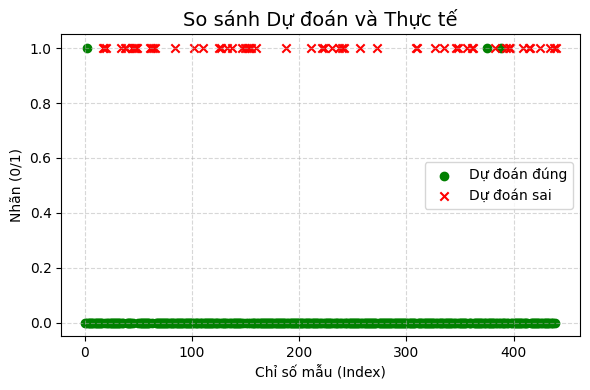

In [59]:
model = MyLogisticRegression(eta=0.01, maxcount = 1000000)
helper_and_plot(*train_test_split(X.to_numpy(), y, test_size = 0.3, random_state = 42), model = model, command = 'Chạy với dữ liệu đã giảm chiều', reduce_name = 'PCA', n_components = 6)


==================== Chạy với dữ liệu đã giảm chiều ====================
X_train: (882, 6) X_test: (588, 6)
Total time: 0.011718273162841797
Accuracy of model LogisticRegression: 0.8639455782312925
Accuracy train of model LogisticRegression: 0.8242630385487528
Confuse matrix: 
[[507   0]
 [ 80   1]]
==================== Chạy với dữ liệu đã giảm chiều ====================



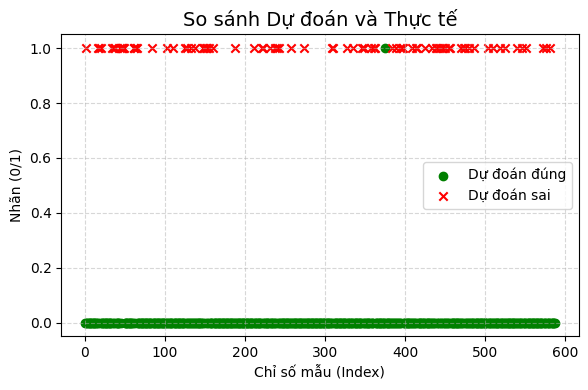

In [60]:
model = LogisticRegression()
helper_and_plot(*train_test_split(X.to_numpy(), y, test_size = 0.4, random_state = 42), model = model, command = 'Chạy với dữ liệu đã giảm chiều', reduce_name = 'PCA', n_components = 6)

Mô hình có phù hợp hay không?

Với dữ liệu có 35 thuộc tính (16 liên tục, 19 phân loại) và phân bố nhãn mất cân bằng (yes/no ≈ 0.16), mô hình Logistic Regression nhìn chung vẫn phù hợp vì đơn giản, dễ huấn luyện và cho kết quả ổn định. Tuy nhiên, ở các trường hợp không giảm chiều hoặc dùng PCA, mô hình có dấu hiệu thiên lệch về lớp đa số (no), thể hiện qua ma trận nhầm lẫn mất cân đối.

Logistic Regression là mô hình tuyến tính, có khả năng diễn giải tốt, phù hợp với dữ liệu có cả đặc trưng liên tục và phân loại (sau khi mã hóa one-hot).

Về kết quả của mô hình, khi không giảm chiều hoặc chỉ giảm chiều bằng PCA, mô hình đạt độ chính xác khoảng 0.8x, tuy nhiên ma trận nhầm lẫn cho thấy dữ liệu phân bố không đều: mô hình có xu hướng dự đoán lớp “no” nhiều hơn, dẫn tới khả năng nhận diện lớp “yes” (thiểu số) kém hơn. Điều này xuất phát từ sự mất cân bằng trong dữ liệu (class imbalance), khiến mô hình “nghiêng” về phía lớp chiếm đa số để tối ưu hóa độ chính xác tổng thể.

![Biểu đồ so sánh dự đoán và thực tế sử dụng PCA](../assets/image/img_1.png)

Khi sử dụng LDA (Linear Discriminant Analysis) trước Logistic Regression, kết quả cải thiện rõ rệt.
Lý do là LDA vừa giảm chiều, vừa giữ lại thông tin phân tách giữa các lớp, giúp dữ liệu sau biến đổi có ranh giới tuyến tính rõ ràng hơn. Mô hình Logistic Regression vì vậy học được ranh giới phân lớp hiệu quả hơn, giảm thiểu nhầm lẫn và cải thiện khả năng nhận diện lớp thiểu số.

![Biểu đồ so sánh dự đoán và thực tế sử dụng LDA](../assets/image/img.png)


Tuy nhiên, ở một số trường hợp (như khi không giảm chiều hoặc giảm bằng PCA), ma trận nhầm lẫn cho thấy mô hình gần như chỉ dự đoán một lớp duy nhất (ví dụ [[255, 0], [39, 0]]), tức là mô hình đã học lệch — biểu hiện của overfitting do mất cân bằng dữ liệu.